In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Visualisation Datasets/phys_and_computsci_articles.csv")

In [ ]:
df.head()

,title,abstract,doi,citations,accesses,online_attention,published_datetime,Topic
0,Spin Berry curvature-enhanced orbital Zeeman e...,Berry phases and the related concept of Berry ...,https://doi.org/10.1038/s41567-024-02487-z,0,353,1,22 April 2024,Physics
1,Room-temperature flexible manipulation of the ...,The quantum metric and Berry curvature are two...,https://doi.org/10.1038/s41567-024-02476-2,0,417,44,22 April 2024,Physics
2,Irreversible entropy transport enhanced by fer...,The nature of particle and entropy flow betwee...,https://doi.org/10.1038/s41567-024-02483-3,0,259,1,22 April 2024,Physics
3,Penning-trap measurement of the Q value of ele...,The investigation of the absolute scale of the...,https://doi.org/10.1038/s41567-024-02461-9,0,1733,105,19 April 2024,Physics
4,Distinct elastic properties and their origins ...,"Glasses and gels, common amorphous solids with...",https://doi.org/10.1038/s41567-024-02456-6,0,1297,14,12 April 2024,Physics


In [ ]:
df.describe()

,citations,online_attention
count,3126.000000,3126.000000
mean,136.651951,46.902751
std,224.012251,112.713735
min,0.000000,0.000000
25%,25.000000,4.000000
50%,73.000000,16.000000
75%,166.000000,54.000000
max,5098.000000,3774.000000


In [ ]:
df.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of title                 3126
abstract              3115
doi                   3126
citations              535
accesses              2206
online_attention       276
published_datetime    1080
Topic                    2
dtype: int64>

## Handling Missing Values

In [ ]:
df.isna().sum()

title                  0
abstract              11
doi                    0
citations              0
accesses               0
online_attention       0
published_datetime     0
Topic                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

## Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

## **Sentiment Score**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

## Sentiment analyser working

In [ ]:
sia.polarity_scores('This is amazing.')

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

In [ ]:
sia.polarity_scores('This is horrible')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [ ]:
res = {}
myid = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = row['title']
    text = row['abstract']
    polarity_scores = sia.polarity_scores(text)
    res[myid] = {'title': title,
                 'compound_score': polarity_scores['compound'],
                 'positive_score': polarity_scores['pos'],
                 'negative_score': polarity_scores['neg'],
                 'neutral_score': polarity_scores['neu']}
    myid += 1

  0%|          | 0/3115 [00:00<?, ?it/s]

In [ ]:
res_df = pd.DataFrame.from_dict(res, orient='index')
res_df

,title,compound_score,positive_score,negative_score,neutral_score
0,Spin Berry curvature-enhanced orbital Zeeman e...,0.1027,0.020,0.013,0.967
1,Room-temperature flexible manipulation of the ...,-0.0258,0.028,0.029,0.943
2,Irreversible entropy transport enhanced by fer...,0.9022,0.067,0.000,0.933
3,Penning-trap measurement of the Q value of ele...,0.9717,0.141,0.039,0.820
4,Distinct elastic properties and their origins ...,0.7140,0.056,0.041,0.903
...,...,...,...,...,...
3110,An efficient and effective method to identify ...,-0.9538,0.059,0.128,0.813
3111,Learning properties of ordered and disordered ...,0.2006,0.042,0.038,0.920
3112,A kinetic ensemble of the Alzheimer’s Aβ peptide,0.9260,0.090,0.000,0.910
3113,Stable maintenance of hidden switches as a str...,0.6808,0.086,0.049,0.864


## Define Most Positive Article Topics

In [ ]:
sorted_res_desc = res_df.sort_values(by='compound_score')
sorted_res_desc.head(20)

,title,compound_score,positive_score,negative_score,neutral_score
1336,Measurement of matter–antimatter differences i...,-0.9950,0.033,0.271,0.696
1789,Origins of bad-metal conductivity and the insu...,-0.9877,0.042,0.187,0.771
1676,Photon transport enhanced by transverse Anders...,-0.9875,0.014,0.173,0.813
1855,The extreme vulnerability of interdependent sp...,-0.9874,0.030,0.188,0.782
517,Resolving catastrophic error bursts from cosmi...,-0.9824,0.053,0.164,0.783
1802,Liposome adhesion generates traction stress,-0.9786,0.024,0.165,0.811
2130,Liquid–liquid critical point in supercooled si...,-0.9747,0.051,0.167,0.782
2752,Low-temperature vortex liquid in La2âˆ’xSrxCuO4,-0.9735,0.027,0.153,0.820
571,Search for charged-lepton-flavour violation in...,-0.9730,0.039,0.126,0.834
746,Electron acceleration in laboratory-produced t...,-0.9730,0.067,0.160,0.773


## Define Most Negative Article Topics

In [ ]:
sorted_res_asc = res_df.sort_values(by='compound_score', ascending=True)
sorted_res_asc.head(20)

,title,compound_score,positive_score,negative_score,neutral_score
1336,Measurement of matter–antimatter differences i...,-0.9950,0.033,0.271,0.696
1789,Origins of bad-metal conductivity and the insu...,-0.9877,0.042,0.187,0.771
1676,Photon transport enhanced by transverse Anders...,-0.9875,0.014,0.173,0.813
1855,The extreme vulnerability of interdependent sp...,-0.9874,0.030,0.188,0.782
517,Resolving catastrophic error bursts from cosmi...,-0.9824,0.053,0.164,0.783
1802,Liposome adhesion generates traction stress,-0.9786,0.024,0.165,0.811
2130,Liquid–liquid critical point in supercooled si...,-0.9747,0.051,0.167,0.782
2752,Low-temperature vortex liquid in La2âˆ’xSrxCuO4,-0.9735,0.027,0.153,0.820
571,Search for charged-lepton-flavour violation in...,-0.9730,0.039,0.126,0.834
746,Electron acceleration in laboratory-produced t...,-0.9730,0.067,0.160,0.773


## Sentiment Labeling and Plotting

In [ ]:
def get_sentiment_label(compound_score):
    if compound_score >= 0.5:
        return 'Very Positive'
    elif 0 <= compound_score < 0.5:
        return 'Positive'
    elif -0.5 <= compound_score < 0:
        return 'Negative'
    else:
        return 'Very Negative'

In [ ]:
res_df['sentiment_label'] = res_df['compound_score'].apply(get_sentiment_label)

In [ ]:
res_df['sentiment_label']

0            Positive
1            Negative
2       Very Positive
3       Very Positive
4       Very Positive
            ...      
3110    Very Negative
3111         Positive
3112    Very Positive
3113    Very Positive
3114    Very Positive
Name: sentiment_label, Length: 3115, dtype: object

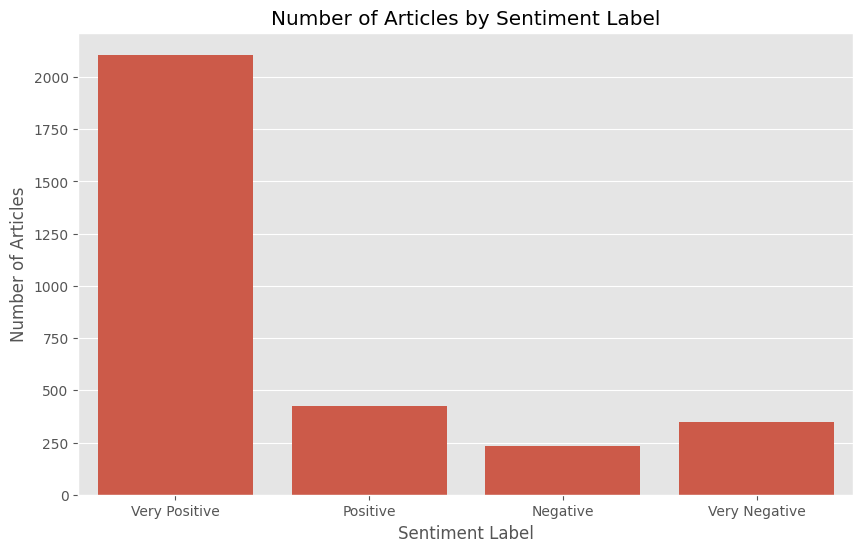

In [ ]:
sentiment_order = ['Very Positive', 'Positive', 'Negative', 'Very Negative']


plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=res_df, order=sentiment_order)
plt.title('Number of Articles by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Articles')
plt.show()

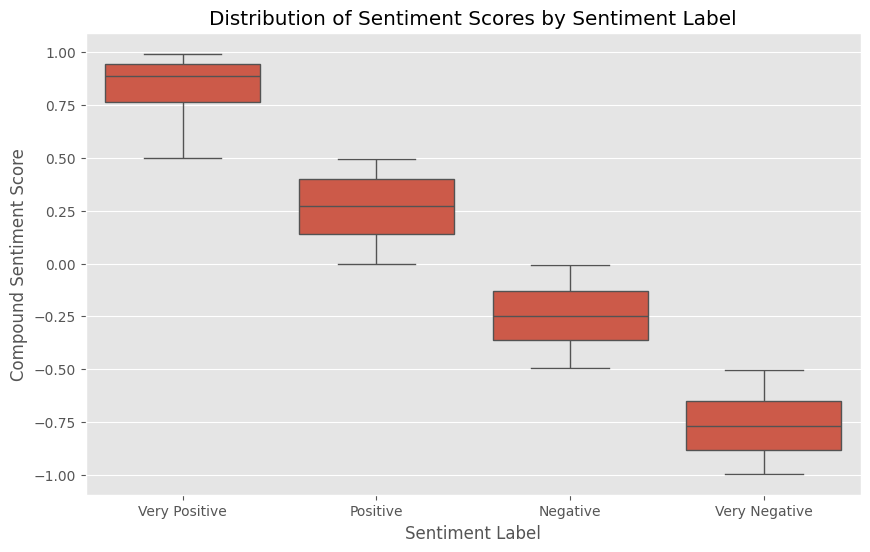

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label', y='compound_score', data=res_df, order=sentiment_order)
plt.title('Distribution of Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Compound Sentiment Score')
plt.show()

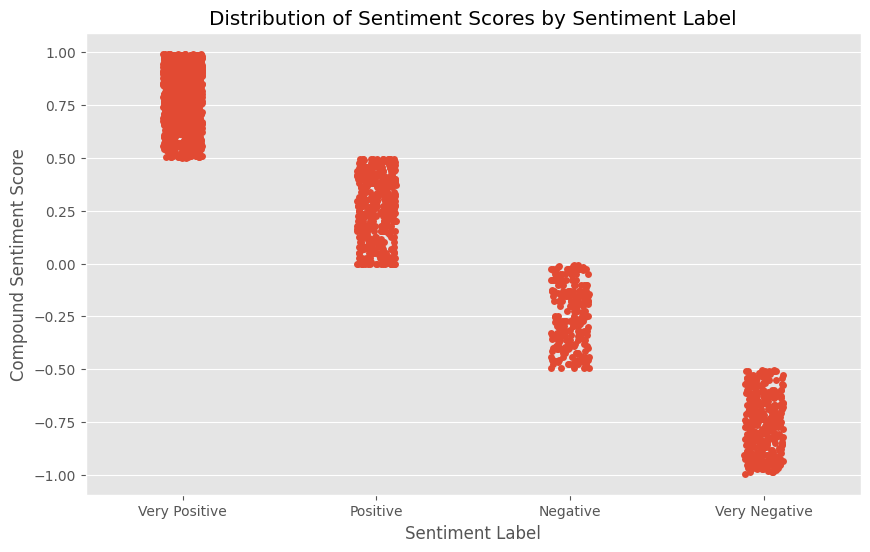

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='sentiment_label', y='compound_score', data=res_df, order=sentiment_order, jitter=True)
plt.title('Distribution of Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Compound Sentiment Score')
plt.show()